<a href="https://colab.research.google.com/github/mnenedavid/Python_Simple_Projects/blob/master/STATISTICAL_MEASURES_CUMULATIVE_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Measures - Cumulative Lab

## Introduction

Another section down! Let's pull together the statistical measures learned so far to analyze a dataset and produce some business recommendations.

## Objectives

You will be able to:

* Recall the concepts and applications of measures of central tendency and dispersion
* Practice applying and interpreting measures of central tendency and dispersion
* Recall the concepts and applications of covariance and correlation
* Practice applying and interpreting covariance and correlation

## Your Task: Sales Data Analysis and Advertising Recommendations

![business meeting](https://curriculum-content.s3.amazonaws.com/data-science/images/business_meeting.jpg)

<span>Photo by <a href="https://unsplash.com/@sctgrhm?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Scott Graham</a> on <a href="https://unsplash.com/s/photos/graph?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

### Business Understanding

Imagine you work for a company that sells widgets<sup>1</sup> and your boss has asked you to look into the sales data across your media markets for this year. She wants to know:

1. What sales volume do we have in a typical market?
2. How variable are sales across markets?
3. If we have 25k more dollars to spend in advertising per market, should we spend it on TV, radio, or newspaper ads?

<sup>1</sup>*Here we are using the [second definition](https://www.merriam-webster.com/dictionary/widget) of widget: "an unnamed article considered for purposes of hypothetical example"*

### Data Understanding

For this lab we will be using a popular dataset known as the "Advertising Dataset". It comes from [_An Introduction to Statistical Learning with Applications in R_](https://statlearning.com) by G. James, D. Witten,  T. Hastie and R. Tibshirani. We have downloaded this dataset for you and stored it in this repository.

This dataset contains four lists. Each number in each list represents the value for that list in a given market. The four lists are:

1. `sales`: the number of widgets sold (in thousands)
2. `tv`: the amount of money (in thousands of dollars) spent on TV ads
3. `radio`: the amount of money (in thousands of dollars) spent on radio ads
4. `newspaper`: the amount of money (in thousands of dollars) spent on newspaper ads

So, for example:
- the **third number** from each list represents the value of `sales`, `tv`, `radio`, and `newspaper` in **one** market,
- the **fourth number** from each list represents the value of `sales`, `tv`, `radio`, and `newspaper` in **another** market,

and so on.


### Requirements

#### 1. Sales Data Summary

Write code that describes the number of markets a given list has records for, as well as the sales numbers for the markets with the minimum and maximum sales.

#### 2. Typical Sales Volume

Use a measure of central tendency to describe a "typical" market's sales.

#### 3. Dispersion of Sales Volume

Use a measure of dispersion to describe how variable sales are across markets.

#### 4. Correlations between Advertising Expenditure and Sales

Calculate the correlation between TV, radio, and newspaper ad spending and widget sales.

#### 5. Where to Spend Additional Dollars

Use the findings from step 4 to make a recommendation.

## Sales Data Summary

In the cell below, we've opened up the dataset and loaded it into lists named `sales`, `tv`, `radio`, and `newspaper`.

In [ ]:
# Run this cell without changes
import pandas as pd

data = pd.read_csv("advertising.csv", index_col=0)

sales = list(data["sales"])
tv = list(data["TV"])
radio = list(data["radio"])
newspaper = list(data["newspaper"])

# display the first 10 sales amounts
sales[:10]

[22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6]

Replace `None` with appropriate code so that this cell prints out the correct information. For this part, you only need to use the `sales` variable.

**Reminder**: Replace `None` with code that **calculates** the answer.  Don't calculate the answer by hand and then replace `None` with the number of your answer!

In [ ]:
# Replace None with appropriate code
num_markets = len(sales)
min_sales = min(sales)
max_sales = max(sales)

print(f"""
This dataset contains records for {num_markets} markets

The fewest sales for any market was {min_sales} thousand widgets

The most sales for any market was {max_sales} thousand widgets
""")


This dataset contains records for 200 markets

The fewest sales for any market was 1.6 thousand widgets

The most sales for any market was 27.0 thousand widgets



Run this code to create a histogram of all sales data:

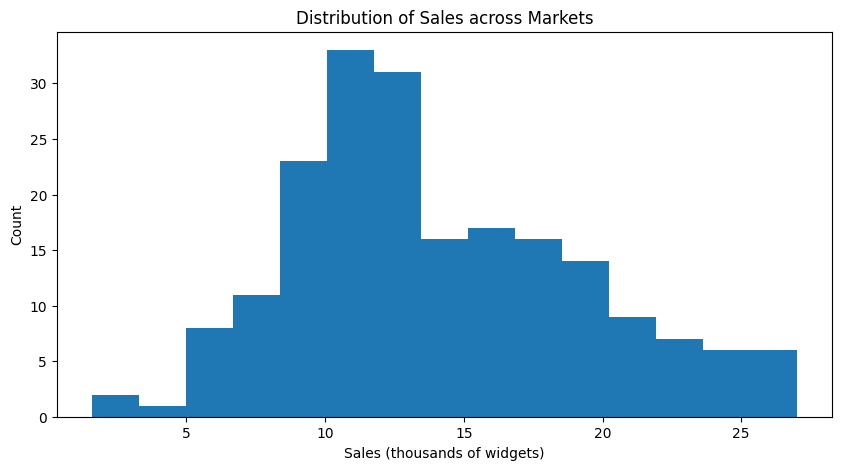

In [ ]:
# Run this cell without changes
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(sales, bins=15)

ax.set_xlabel("Sales (thousands of widgets)")
ax.set_ylabel("Count")

ax.set_title("Distribution of Sales across Markets");

## Typical Sales Volume

Now we should be able to address the first business question: _What sales volume do we have in a typical market?_

That sounds like a question to be answered by a **measure of central tendency**.

Reminder: the three measures of central tendency we've introduced are:

 - Mean
 - Median
 - Mode

Choose the measure that seems most reasonable to you (it's a judgment call — there isn't always a single correct answer!) and complete the cell below, using NumPy or SciPy to compute the measure.

In [ ]:
# Replace None or <None> with appropriate code

import numpy as np
from scipy import stats

# Assign measure_central_tendency to the mean, median, or mode of the sales data
measure_central_tendency = np.mean(sales)

print(f"""
Typical sales volume is {measure_central_tendency} thousand widgets

I chose <None> as the relevant measure because <None>
""")



Typical sales volume is 14.0225 thousand widgets

I chose <None> as the relevant measure because <None>



## Dispersion of Sales Volume

Now that we have a number to represent the typical sales volume, let's answer: *How variable are sales across markets?*

That sounds like a question to be answered by a **measure of dispersion** (also known as a measure of spread).

Reminder: the measures of dispersion we've introduced are:

 - (Average) absolute deviation
 - Variance
 - Standard deviation
 - Interquartile range

Choose the measure that seems the most reasonable to you, and write up your answer in the cell below, following the format from the previous question (first calculating the measure, then explaining your answer).

In [ ]:
# Your answer here
standard_dev = np.std(sales)
print(f"The standard deviation is {round(standard_dev,2)}, meaning the sales in the different markets are {round(standard_dev,2)} thousands from the sales mean: {measure_central_tendency}")

The standard deviation is 5.2, meaning the sales in the different markets are 5.2 thousands from the sales mean: 14.0225


## Correlations between Advertising Expenditure and Sales

Now that we have a general understanding of the distribution of the sales data, we can start to answer: *If we have 25k more dollars to spend in advertising per market, should we spend it on TV, radio, or newspaper ads?*

(Eventually we will learn more sophisticated multivariate modeling techniques that will allow us to simulate the impacts of different choices here such as *given TV spending of $x_1$ and radio spending of $x_2$, how would increasing newspaper spending by 25k impact $y$*?, but for now we will just use the tools we have learned so far.)

In order to make this recommendation, let's find the **correlation between each advertising medium and the associated sales**.

(Recall that *covariance* is the numerator of the correlation formula, and that we typically use correlation rather than just covariance because its magnitude is more interpretable.)

In the following cell, compute the correlation between `sales` and `tv`, `radio`, and `newspaper` using NumPy.

In [ ]:
# Replace None with appropriate code

tv_corr = np.corrcoef(sales, tv)[0,1]
radio_corr = np.corrcoef(sales, radio)[0,1]
newspaper_corr = np.corrcoef(sales, newspaper)[0,1]

print("Correlation of Sales and TV Ad Spending:", tv_corr)
print("Correlation of Sales and Radio Ad Spending:", radio_corr)
print("Correlation of Sales and Newspaper Ad Spending:", newspaper_corr)

Correlation of Sales and TV Ad Spending: 0.7822244248616061
Correlation of Sales and Radio Ad Spending: 0.5762225745710551
Correlation of Sales and Newspaper Ad Spending: 0.22829902637616528


Which type of ad spending has the highest correlation?

In [ ]:
# Replace <None> with TV, radio, or newspaper
print("TV has the highest correlation with sales")

TV has the highest correlation with sales


Let's also plot out each of the ad types vs. sales:

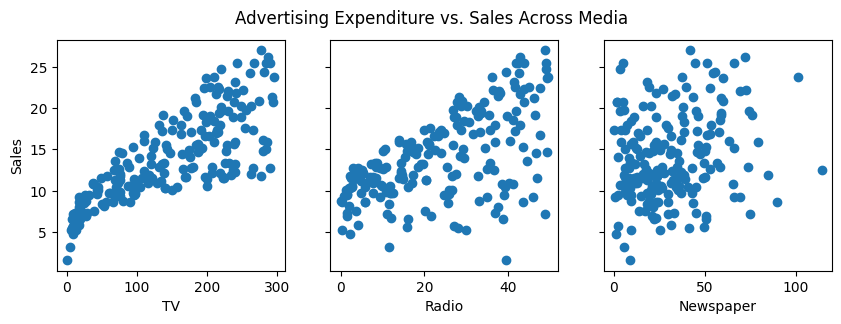

In [ ]:
# Run this cell without changes

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,3), sharey=True)

ax1.scatter(tv, sales)
ax2.scatter(radio, sales)
ax3.scatter(newspaper, sales)

ax1.set_xlabel("TV")
ax2.set_xlabel("Radio")
ax3.set_xlabel("Newspaper")

ax1.set_ylabel("Sales")

fig.suptitle("Advertising Expenditure vs. Sales Across Media");

## Where to Spend Additional Dollars

Based on the correlation numbers and a visual inspection of those plots, make a recommendation to your boss about where to spend 25k extra dollars per market and why.

In [ ]:
# Your answer here
Tv

## Conclusion

In this cumulative lab, you practiced analyzing sales and advertising data in order to make a business recommendation. Unlike some other labs, there was more ambiguity and we asked you to make some judgment calls in order to use data science concepts for a business audience. In the rest of the course, you will continue building your technical skills and technical communication skills!